In [4]:
import sys
sys.path.append('./KANs')

from KANs.Efficient_KAN import KAN
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
torch.manual_seed(42)

layers = [1] + [8]*3 + [1]

model = KAN(layers, grid_size=3,modified_output=False)


In [5]:
# 创建训练数据
x = torch.linspace(-math.pi, math.pi, 1000).reshape(-1, 1)  # 输入数据
y = torch.sin(x)  # 目标数据

# 定义损失函数
criterion = nn.MSELoss()

# 定义优化器
optimizer1 = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    # 训练模型1（普通MLP）
    optimizer1.zero_grad()
    output1 = model(x)
    loss1 = criterion(output1, y)
    loss1.backward()
    optimizer1.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}')
        print(f'Standard KAN Loss: {loss1.item():.6f}')
        print('-------------------')    

Epoch 0
Standard KAN Loss: 1.759880
-------------------
Epoch 100
Standard KAN Loss: 0.002002
-------------------
Epoch 200
Standard KAN Loss: 0.000702
-------------------
Epoch 300
Standard KAN Loss: 0.000223
-------------------
Epoch 400
Standard KAN Loss: 0.000042
-------------------
Epoch 500
Standard KAN Loss: 0.000023
-------------------
Epoch 600
Standard KAN Loss: 0.000014
-------------------
Epoch 700
Standard KAN Loss: 0.000009
-------------------
Epoch 800
Standard KAN Loss: 0.000006
-------------------
Epoch 900
Standard KAN Loss: 0.000004
-------------------


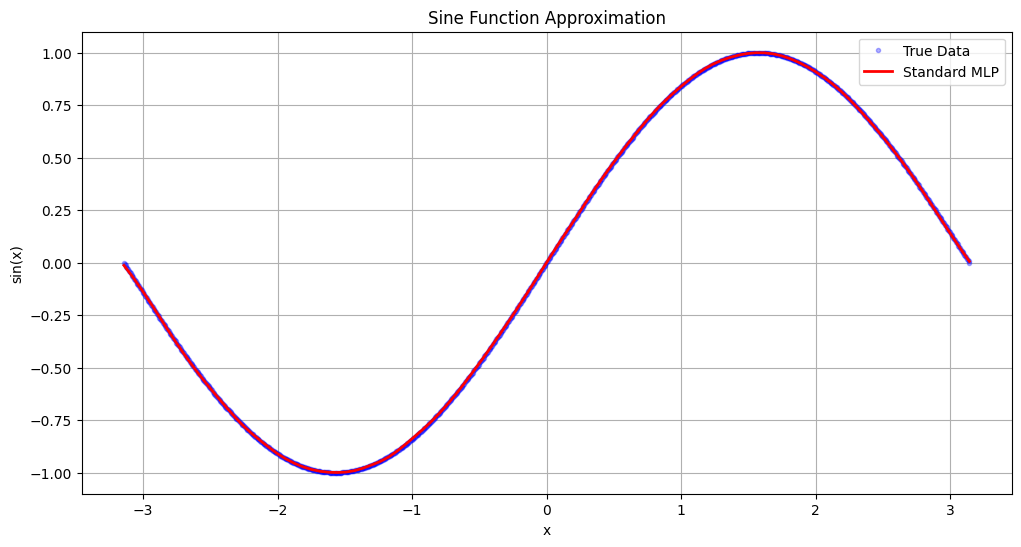

In [6]:
model.eval()
with torch.no_grad():
    test_x = torch.linspace(-math.pi, math.pi, 100).reshape(-1, 1)
    pred_y1 = model(test_x)

# 可视化结果
plt.figure(figsize=(12, 6))

# 绘制原始数据
plt.plot(x.numpy(), y.numpy(), 'b.', label='True Data', alpha=0.3)

# 绘制两个模型的预测结果
plt.plot(test_x.numpy(), pred_y1.numpy(), 'r-', label='Standard MLP', linewidth=2)

plt.legend()
plt.title('Sine Function Approximation')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.show()